# 第五章 Logistic算法

## Logistic回归概述

Logistic 回归虽然名字叫回归，但是它是用来做分类的。其主要思想是: 根据现有数据对分类边界线建立回归公式，以此进行分类。

## 须知概念

### Sigmoid 函数

**回归概念**

假设现在有一些数据点，我们用一条直线对这些点进行拟合（这条直线称为最佳拟合直线），这个拟合的过程就叫做回归。进而可以得到对这些点的拟合直线方程，那么我们根据这个回归方程，怎么进行分类呢？请看下面。

**二值型输出分类函数** 

我们想要的函数应该是: 能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出 0 或 1.或许你之前接触过具有这种性质的函数，该函数称为 **海维塞得阶跃函数(Heaviside step function)**，或者直接称为**单位阶跃函数**。然而，海维塞得阶跃函数的问题在于: 该函数在跳跃点上从 0 瞬间跳跃到 1，这个瞬间跳跃过程有时很难处理。幸好，另一个函数也有类似的性质（可以输出 0 或者 1 的性质），且数学上更易处理，这就是 Sigmoid 函数。 Sigmoid 函数具体的计算公式如下:

$$ \sigma(z) = \frac {1} {1 + e^{-z} }$$

下图给出了 Sigmoid 函数在不同坐标尺度下的两条曲线图。当 x 为 0 时，Sigmoid 函数值为 0.5 。随着 x 的增大，对应的 Sigmoid 值将逼近于 1 ; 而随着 x 的减小， Sigmoid 值将逼近于 0 。如果横坐标刻度足够大， Sigmoid 函数看起来很像一个阶跃函数。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535969640336_YmIAGIAyBV.jpg)

因此，为了实现 Logistic 回归分类器，我们可以在每个特征上都乘以一个回归系数（如下公式所示），然后把所有结果值相加，将这个总和代入 Sigmoid 函数中，进而得到一个范围在 0~1 之间的数值。任何大于 0.5 的数据被分入 1 类，小于 0.5 即被归入 0 类。所以， Logistic 回归也可以被看成是一种概率估计。


### 基于最优化方法的回归系数确定

Sigmoid 函数的输入记为 z ，由下面公式得到:

$$z_0 = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $$

如果采用向量的写法，上述公式可以写成 $$z = w^Tx $$，它表示将这两个数值向量对应元素相乘然后全部加起来即得到 z 值。其中的向量 x 是分类器的输入数据，向量 w 也就是我们要找到的最佳参数（系数），从而使得分类器尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。我们这里使用的是——梯度上升法。

### 梯度上升法

**梯度的介绍** 

需要一点点向量方面的数学基础

```
向量 = 值 + 方向  
梯度 = 向量
梯度 = 梯度值 + 梯度方向
```

**梯度上升法的思想** 

要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为 ▽ ，则函数 f(x, y) 的梯度由下式表示:

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535973409185_tM4eFBBCho.jpg)

这个梯度意味着要沿 x 的方向移动 f(x, y)对x求偏导$$\frac{\partial f(x,y)}{\partial x}$$ ，沿 y 的方向移动 f(x, y)对y求偏导$$ \frac{\partial f(x,y)}{\partial y} $$。其中，函数$$f(x, y)$$必须要在待计算的点上有定义并且可微。下图是一个具体的例子。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535973585318_O1OeaE8juW.jpg)

上图展示的，梯度上升算法到达每个点后都会重新估计移动的方向。从 P0 开始，计算完该点的梯度，函数就根据梯度移动到下一点 P1。在 P1 点，梯度再次被重新计算，并沿着新的梯度方向移动到 P2 。如此循环迭代，直到满足停止条件。迭代过程中，梯度算子总是保证我们能选取到最佳的移动方向。

上图中的梯度上升算法沿梯度方向移动了一步。可以看到，梯度算子总是指向函数值增长最快的方向。这里所说的是移动方向，而未提到移动量的大小。该量值称为步长，记作 α 。用向量来表示的话，梯度上升算法的迭代公式如下:

$$ w := w + \alpha ▽_Wf(w)$$

该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

介绍一下几个相关的概念：

```
例如：y = w1x1 + w2x2 + ... + wnxn
梯度：参考上图的例子，二维图像，x方向代表第一个系数，也就是 w1，y方向代表第二个系数也就是 w2，这样的向量就是梯度。
α：上面的梯度算法的迭代公式中的阿尔法，这个代表的是移动步长。移动步长会影响最终结果的拟合程度，最好的方法就是随着迭代次数更改移动步长。
步长通俗的理解，100米，如果我一步走10米，我需要走10步；如果一步走20米，我只需要走5步。这里的一步走多少米就是步长的意思。
▽f(w)：代表沿着梯度变化的方向。
```

Note: 我们常听到的是梯度下降算法，它与这里的梯度上升算法是一样的，只是公式中的加法需要变成减法。因此，对应的公式可以写成

$$ w := w - \alpha ▽_Wf(w)$$

梯度上升算法用来求函数的最大值，而梯度下降算法用来求函数的最小值。





**局部最优现象** 

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535973813643_WfTnRPD60a.jpg)

上图表示参数 θ 与误差函数 J(θ) 的关系图，红色的部分是表示 J(θ) 有着比较高的取值，我们需要的是，能够让 J(θ) 的值尽量的低。也就是深蓝色的部分。θ0，θ1 表示 θ 向量的两个维度。

可能梯度下降的最终点并非是全局最小点，可能是一个局部最小点，如我们上图中的右边的梯度下降曲线，描述的是最终到达一个局部最小点，这是我们重新选择了一个初始点得到的。

看来我们这个算法将会在很大的程度上被初始点的选择影响而陷入局部最小点。



## Logistic 回归 原理

### Logistic 回归 工作原理

```
每个回归系数初始化为 1
重复 R 次:
    计算整个数据集的梯度
    使用 步长 x 梯度 更新回归系数的向量
返回回归系数
```
### Logistic 回归 开发流程

* 收集数据: 采用任意方法收集数据
* 准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
* 分析数据: 采用任意方法对数据进行分析。
* 训练算法: 大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
* 测试算法: 一旦训练步骤完成，分类将会很快。
* 使用算法: 首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

### Logistic 回归 算法特点

* 优点: 计算代价不高，易于理解和实现。
* 缺点: 容易欠拟合，分类精度可能不高。  
适用数据类型: 数值型和标称型数据。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535973957394_TkqodoCwJz.jpg)

[清晰版链接](http://netedu.xauat.edu.cn/jpkc/netedu/jpkc/gdsx/homepage/5jxsd/51/513/5308/530807.htm)

## Logistic 回归 项目案例

### 项目案例1: 使用 Logistic 回归在简单数据集上的分类

**项目概述** 

在一个简单的数据集上，采用梯度上升法找到 Logistic 回归分类器在此数据集上的最佳回归系数

**开发流程**

* 收集数据: 可以使用任何方法
* 准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳
* 分析数据: 画出决策边界
* 训练算法: 使用梯度上升找到最佳参数
* 测试算法: 使用 Logistic 回归进行分类
* 使用算法: 对简单数据集中数据进行分类

> 收集数据: 可以使用任何方法

我们采用存储在 TestSet.txt 文本文件中的数据，存储格式如下:

```
-0.017612   14.053064   0
-1.395634   4.662541    1
-0.752157   6.538620    0
-1.322371   7.152853    0
0.423363    11.054677   0
```

绘制在图中，如下图所示:

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536042791389_tWN0foYZD1.jpg)

> 准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳

> 分析数据: 画出决策边界

画出数据集和 Logistic 回归最佳拟合直线的函数

In [1]:
def plotBestFit(dataArr, labelMat, weights):
    '''
        Desc:
            将我们得到的数据可视化展示出来
        Args:
            dataArr:样本数据的特征
            labelMat:样本数据的类别标签，即目标变量
            weights:回归系数
        Returns:
            None
    '''

    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

> 训练算法: 使用梯度上升找到最佳参数

Logistic 回归梯度上升优化算法

In [2]:
# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。
def gradAscent(dataMatIn, classLabels):
    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix 
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)              # 向量相减
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    return array(weights)

大家看到这儿可能会有一些疑惑，就是，我们在迭代中更新我们的回归系数，后边的部分是怎么计算出来的？为什么会是 **alpha * dataMatrix.transpose() * error**?因为这就是我们所求的梯度，也就是对 f(w) 对 w 求一阶导数。具体推导如下:

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536043128966_SjTwjsfCLA.jpg)

> 测试算法: 使用 Logistic 回归进行分类

In [3]:
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet("./dataset/TestSet.txt")

    # print dataMat, '---\n', labelMat
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = array(dataMat)
    # print dataArr
    weights = gradAscent(dataArr, labelMat)
    # weights = stocGradAscent0(dataArr, labelMat)
    # weights = stocGradAscent1(dataArr, labelMat)
    # print '*'*30, weights

    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)

> 使用算法: 对简单数据集中数据进行分类

**注意** 

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为 随机梯度上升算法。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理”。

随机梯度上升算法可以写成如下的伪代码:

```
所有回归系数初始化为 1
对数据集中每个样本
    计算该样本的梯度
    使用 alpha x gradient 更新回归系数值
返回回归系数值
```
以下是随机梯度上升算法的实现代码:

In [5]:
# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
        print (weights, "*"*10 , dataMatrix[i], "*"*10 , error)
        weights = weights + alpha * error * dataMatrix[i]
    return weights

可以看到，随机梯度上升算法与梯度上升算法在代码上很相似，但也有一些区别: 第一，后者的变量 h 和误差 error 都是向量，而前者则全是数值；第二，前者没有矩阵的转换过程，所有变量的数据类型都是 NumPy 数组。

判断优化算法优劣的可靠方法是看它是否收敛，也就是说参数是否达到了稳定值，是否还会不断地变化？下图展示了随机梯度上升算法在 200 次迭代过程中回归系数的变化情况。其中的系数2，也就是 X2 只经过了 50 次迭代就达到了稳定值，但系数 1 和 0 则需要更多次的迭代。如下图所示:

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536043270064_qQTJtg2N8Y.jpg)

针对这个问题，我们改进了之前的随机梯度上升算法，如下:

In [6]:
# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = range(m)
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

上面的改进版随机梯度上升算法，我们修改了两处代码。

第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）。

程序运行之后能看到类似于下图的结果图。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536043323597_fhOviGg7Sx.jpg)

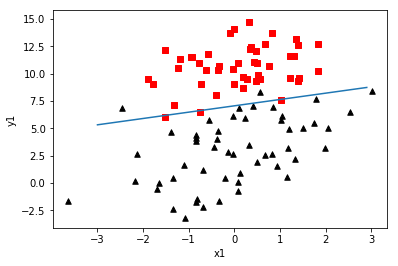

In [7]:
#项目1完整代码

#!/usr/bin/python
# -*- coding:utf-8 -*-


import numpy as np
%matplotlib inline


# ------使用 Logistic 回归在简单数据集上的分类-----------

def load_data_set():
    """
    加载数据集
    :return:返回两个数组，普通数组 
        data_arr -- 原始数据的特征
        label_arr -- 原始数据的标签，也就是每条样本对应的类别
    """
    data_arr = []
    label_arr = []
    f = open('./dataset/TestSet.txt', 'r')
    for line in f.readlines():
        line_arr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        data_arr.append([1.0, np.float(line_arr[0]), np.float(line_arr[1])])
        label_arr.append(int(line_arr[2]))
    return data_arr, label_arr


def sigmoid(x):
    # 这里其实非常有必要解释一下，会出现的错误 RuntimeWarning: overflow encountered in exp
    # 这个错误在学习阶段虽然可以忽略，但是我们至少应该知道为什么
    # 这里是因为我们输入的有的 x 实在是太小了，比如 -6000之类的，那么计算一个数字 np.exp(6000)这个结果太大了，没法表示，所以就溢出了
    # 如果是计算 np.exp（-6000），这样虽然也会溢出，但是这是下溢，就是表示成零
    # 去网上搜了很多方法，比如 使用bigfloat这个库（我竟然没有安装成功，就不尝试了，反正应该是有用的
    return 1.0 / (1 + np.exp(-x))


def grad_ascent(data_arr, class_labels):
    """
    梯度上升法，其实就是因为使用了极大似然估计，这个大家有必要去看推导，只看代码感觉不太够
    :param data_arr: 传入的就是一个普通的数组，当然你传入一个二维的ndarray也行
    :param class_labels: class_labels 是类别标签，它是一个 1*100 的行向量。
                    为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给label_mat
    :return: 
    """
    # 注意一下，我把原来 data_mat_in 改成data_arr,因为传进来的是一个数组，用这个比较不容易搞混
    # turn the data_arr to numpy matrix
    data_mat = np.mat(data_arr)
    # 变成矩阵之后进行转置
    label_mat = np.mat(class_labels).transpose()
    # m->数据量，样本数 n->特征数
    m, n = np.shape(data_mat)
    # 学习率，learning rate
    alpha = 0.001
    # 最大迭代次数，假装迭代这么多次就能收敛2333
    max_cycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = np.ones((n, 1))
    for k in range(max_cycles):
        # 这里是点乘  m x 3 dot 3 x 1
        h = sigmoid(data_mat * weights)
        error = label_mat - h
        # 这里比较建议看一下推导，为什么这么做可以，这里已经是求导之后的
        weights = weights + alpha * data_mat.transpose() * error
    return weights


def plot_best_fit(weights):
    """
    可视化
    :param weights: 
    :return: 
    """
    import matplotlib.pyplot as plt
    data_mat, label_mat = load_data_set()
    data_arr = np.array(data_mat)
    n = np.shape(data_mat)[0]
    x_cord1 = []
    y_cord1 = []
    x_cord2 = []
    y_cord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            x_cord1.append(data_arr[i, 1])
            y_cord1.append(data_arr[i, 2])
        else:
            x_cord2.append(data_arr[i, 1])
            y_cord2.append(data_arr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1, y_cord1, s=30, color='k', marker='^')
    ax.scatter(x_cord2, y_cord2, s=30, color='red', marker='s')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.show()


def stoc_grad_ascent0(data_mat, class_labels):
    """
    随机梯度上升，只使用一个样本点来更新回归系数
    :param data_mat: 输入数据的数据特征（除去最后一列）,ndarray
    :param class_labels: 输入数据的类别标签（最后一列数据）
    :return: 得到的最佳回归系数
    """
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        # sum(data_mat[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,
        # 此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(data_mat[i] * weights))
        error = class_labels[i] - h
        # 还是和上面一样，这个先去看推导，再写程序
        weights = weights + alpha * error * data_mat[i]
    return weights


def stoc_grad_ascent1(data_mat, class_labels, num_iter=150):
    """
    改进版的随机梯度上升，使用随机的一个样本来更新回归系数
    :param data_mat: 输入数据的数据特征（除去最后一列）,ndarray
    :param class_labels: 输入数据的类别标签（最后一列数据
    :param num_iter: 迭代次数
    :return: 得到的最佳回归系数
    """
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        # 这里必须要用list，不然后面的del没法使用
        data_index = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4 / (1.0 + j + i) + 0.01
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[data_index[rand_index]] * weights))
            error = class_labels[data_index[rand_index]] - h
            weights = weights + alpha * error * data_mat[data_index[rand_index]]
            del(data_index[rand_index])
    return weights


def test():
    """
    这个函数只要就是对上面的几个算法的测试，这样就不用每次都在power shell 里面操作，不然麻烦死了
    :return: 
    """
    data_arr, class_labels = load_data_set()
    # 注意，这里的grad_ascent返回的是一个 matrix, 所以要使用getA方法变成ndarray类型
    # weights = grad_ascent(data_arr, class_labels).getA()
    # weights = stoc_grad_ascent0(np.array(data_arr), class_labels)
    weights = stoc_grad_ascent1(np.array(data_arr), class_labels)
    plot_best_fit(weights)

if __name__ == '__main__':
    test()




### 项目案例2: 从疝气病症预测病马的死亡率

**项目概述**

使用 Logistic 回归来预测患有疝病的马的存活问题。疝病是描述马胃肠痛的术语。然而，这种病不一定源自马的胃肠问题，其他问题也可能引发马疝病。这个数据集中包含了医院检测马疝病的一些指标，有的指标比较主观，有的指标难以测量，例如马的疼痛级别。

**开发流程**

```
收集数据: 给定数据文件
准备数据: 用 Python 解析文本文件并填充缺失值
分析数据: 可视化并观察数据
训练算法: 使用优化算法，找到最佳的系数
测试算法: 为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，
         通过改变迭代的次数和步长的参数来得到更好的回归系数
使用算法: 实现一个简单的命令行程序来手机马的症状并输出预测结果并非难事，
         这可以作为留给大家的一道习题
```

> 收集数据: 给定数据文件

病马的训练数据已经给出来了，如下形式存储在文本文件中:
```
1.000000    1.000000    39.200000   88.000000   20.000000   0.000000    0.000000    4.000000    1.000000    3.000000    4.000000    2.000000    0.000000    0.000000    0.000000    4.000000    2.000000    50.000000   85.000000   2.000000    2.000000    0.000000
2.000000    1.000000    38.300000   40.000000   24.000000   1.000000    1.000000    3.000000    1.000000    3.000000    3.000000    1.000000    0.000000    0.000000    0.000000    1.000000    1.000000    33.000000   6.700000    0.000000    0.000000    1.000000
```

> 准备数据: 用 Python 解析文本文件并填充缺失值

处理数据中的缺失值

假设有100个样本和20个特征，这些数据都是机器收集回来的。若机器上的某个传感器损坏导致一个特征无效时该怎么办？此时是否要扔掉整个数据？这种情况下，另外19个特征怎么办？ 它们是否还可以用？答案是肯定的。因为有时候数据相当昂贵，扔掉和重新获取都是不可取的，所以必须采用一些方法来解决这个问题。

下面给出了一些可选的做法： 使用可用特征的均值来填补缺失值； 使用特殊值来填补缺失值，如 -1； 忽略有缺失值的样本； 使用有相似样本的均值添补缺失值； * 使用另外的机器学习算法预测缺失值。

现在，我们对下一节要用的数据集进行预处理，使其可以顺利地使用分类算法。在预处理需要做两件事: * 所有的缺失值必须用一个实数值来替换，因为我们使用的 NumPy 数据类型不允许包含缺失值。我们这里选择实数 0 来替换所有缺失值，恰好能适用于 Logistic 回归。这样做的直觉在于，我们需要的是一个在更新时不会影响系数的值。回归系数的更新公式如下:

```
weights = weights + alpha * error * dataMatrix[randIndex]

如果 dataMatrix 的某个特征对应值为 0，那么该特征的系数将不做更新，即:

weights = weights

另外，由于 Sigmoid(0) = 0.5 ，即它对结果的预测不具有任何倾向性，因此我们上述做法也不会对误差造成任何影响。基于上述原因，将缺失值用 0 代替既可以保留现有数据，也不需要对优化算法进行修改。此外，该数据集中的特征取值一般不为 0，因此在某种意义上说它也满足 “特殊值” 这个要求。
```

如果在测试数据集中发现了一条数据的类别标签已经缺失，那么我们的简单做法是将该条数据丢弃。这是因为类别标签与特征不同，很难确定采用某个合适的值来替换。采用 Logistic 回归进行分类时这种做法是合理的，而如果采用类似 kNN 的方法就可能不太可行。

原始的数据集经过预处理后，保存成两个文件: horseColicTest.txt 和 horseColicTraining.txt 。

> 分析数据: 可视化并观察数据

将数据使用 MatPlotlib 打印出来，观察数据是否是我们想要的格式

> 训练算法: 使用优化算法，找到最佳的系数

下面给出 原始的梯度上升算法，随机梯度上升算法，改进版随机梯度上升算法 的代码:

In [8]:
# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。
def gradAscent(dataMatIn, classLabels):
    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix 
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)              # 向量相减
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    return array(weights)


# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
        print (weights, "*"*10 , dataMatrix[i], "*"*10 , error)
        weights = weights + alpha * error * dataMatrix[i]
    return weights


# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = range(m)
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

> 测试算法: 为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长的参数来得到更好的回归系数

Logistic 回归分类函数

In [9]:
# 分类函数，根据回归系数和特征向量来计算 Sigmoid的值
def classifyVector(inX, weights):
    '''
    Desc: 
        最终的分类函数，根据回归系数和特征向量来计算 Sigmoid 的值，大于0.5函数返回1，否则返回0
    Args:
        inX -- 特征向量，features
        weights -- 根据梯度下降/随机梯度下降 计算得到的回归系数
    Returns:
        如果 prob 计算大于 0.5 函数返回 1
        否则返回 0
    '''
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

# 打开测试集和训练集,并对数据进行格式化处理
def colicTest():
    '''
    Desc:
        打开测试集和训练集，并对数据进行格式化处理
    Args:
        None
    Returns:
        errorRate -- 分类错误率
    '''
    frTrain = open('./dataset/horseColicTraining.txt')
    frTest = open('./dataset/horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    # 解析训练数据集中的数据特征和Labels
    # trainingSet 中存储训练数据集的特征，trainingLabels 存储训练数据集的样本对应的分类标签
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    # 使用 改进后的 随机梯度下降算法 求得在此数据集上的最佳回归系数 trainWeights
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    # 读取 测试数据集 进行测试，计算分类错误的样本条数和最终的错误率
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate


# 调用 colicTest() 10次并求结果的平均值
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))) 

> 使用算法: 实现一个简单的命令行程序来收集马的症状并输出预测结果并非难事，这可以作为留给大家的一道习题

In [10]:
# 项目二完整代码
#!/usr/bin/python
# -*- coding:utf-8 -*-


import numpy as np

def sigmoid(x):
    # 这里其实非常有必要解释一下，会出现的错误 RuntimeWarning: overflow encountered in exp
    # 这个错误在学习阶段虽然可以忽略，但是我们至少应该知道为什么
    # 这里是因为我们输入的有的 x 实在是太小了，比如 -6000之类的，那么计算一个数字 np.exp(6000)这个结果太大了，没法表示，所以就溢出了
    # 如果是计算 np.exp（-6000），这样虽然也会溢出，但是这是下溢，就是表示成零
    # 去网上搜了很多方法，比如 使用bigfloat这个库（我竟然没有安装成功，就不尝试了，反正应该是有用的
    return 1.0 / (1 + np.exp(-x))

def stoc_grad_ascent1(data_mat, class_labels, num_iter=150):
    """
    改进版的随机梯度上升，使用随机的一个样本来更新回归系数
    :param data_mat: 输入数据的数据特征（除去最后一列）,ndarray
    :param class_labels: 输入数据的类别标签（最后一列数据
    :param num_iter: 迭代次数
    :return: 得到的最佳回归系数
    """
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        # 这里必须要用list，不然后面的del没法使用
        data_index = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4 / (1.0 + j + i) + 0.01
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[data_index[rand_index]] * weights))
            error = class_labels[data_index[rand_index]] - h
            weights = weights + alpha * error * data_mat[data_index[rand_index]]
            del(data_index[rand_index])
    return weights

def classify_vector(in_x, weights):
    """
    最终的分类函数，根据回归系数和特征向量来计算 Sigmoid 的值，大于0.5函数返回1，否则返回0
    :param in_x: 特征向量，features
    :param weights: 根据梯度下降/随机梯度下降 计算得到的回归系数
    :return: 
    """
    # print(np.sum(in_x * weights))
    prob = sigmoid(np.sum(in_x * weights))
    if prob > 0.5:
        return 1.0
    return 0.0


def colic_test():
    """
    打开测试集和训练集，并对数据进行格式化处理,其实最主要的的部分，比如缺失值的补充（真的需要学会的），人家已经做了
    :return: 
    """
    f_train = open('./dataset/HorseColicTraining.txt', 'r')
    f_test = open('./dataset/HorseColicTest.txt', 'r')
    training_set = []
    training_labels = []
    # 解析训练数据集中的数据特征和Labels
    # trainingSet 中存储训练数据集的特征，trainingLabels 存储训练数据集的样本对应的分类标签
    for line in f_train.readlines():
        curr_line = line.strip().split('\t')
        if len(curr_line) == 1:
            continue    # 这里如果就一个空的元素，则跳过本次循环
        line_arr = [float(curr_line[i]) for i in range(21)]
        training_set.append(line_arr)
        training_labels.append(float(curr_line[21]))
    # 使用 改进后的 随机梯度下降算法 求得在此数据集上的最佳回归系数 trainWeights
    train_weights = stoc_grad_ascent1(np.array(training_set), training_labels, 500)
    error_count = 0
    num_test_vec = 0.0
    # 读取 测试数据集 进行测试，计算分类错误的样本条数和最终的错误率
    for line in f_test.readlines():
        num_test_vec += 1
        curr_line = line.strip().split('\t')
        if len(curr_line) == 1: 
            continue    # 这里如果就一个空的元素，则跳过本次循环
        line_arr = [float(curr_line[i]) for i in range(21)]
        if int(classify_vector(np.array(line_arr), train_weights)) != int(curr_line[21]):
            error_count += 1
    error_rate = error_count / num_test_vec
    print('the error rate is {}'.format(error_rate))
    return error_rate


def multi_test():
    """
    调用 colicTest() 10次并求结果的平均值
    :return: nothing 
    """
    num_tests = 10
    error_sum = 0
    for k in range(num_tests):
        error_sum += colic_test()
    print('after {} iteration the average error rate is {}'.format(num_tests, error_sum / num_tests))
    

if __name__ == '__main__':
    #colic_test()
    multi_test()

the error rate is 0.26865671641791045
the error rate is 0.4925373134328358
the error rate is 0.29850746268656714
the error rate is 0.3283582089552239
the error rate is 0.5074626865671642
the error rate is 0.29850746268656714
the error rate is 0.3283582089552239
the error rate is 0.31343283582089554
the error rate is 0.47761194029850745
the error rate is 0.31343283582089554
after 10 iteration the average error rate is 0.3626865671641791


## 课后练习

使用逻辑回归算法对个人收入水平的数据进行分类

个人收入水平调查分析

数据集链接： https://tianchi.aliyun.com/datalab/dataSet.html?spm=5176.100073.0.0.14156fc1uW82Um&dataId=3657

该数据集是某地区的个人收入调查分析，包含32561条记录，其中目标变量是收入水平（分别是<=50k以及>50k），其他自变量包括年龄，受教育时间，性别，资产净增，资产损失，一周工作时间。